In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
fact_sheet = pd.read_csv(
     "/Users/carterwebb/Desktop/5700_DBM/DBM_Kelp/fact_table_clean.csv"
)

In [14]:
fact_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32650 entries, 0 to 32649
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lid           32650 non-null  object 
 1   name          32650 non-null  object 
 2   date_time     32650 non-null  object 
 3   parameter     32650 non-null  object 
 4   result        32632 non-null  float64
 5   result_units  32650 non-null  object 
 6   depth         32650 non-null  float64
 7   dep_units     32650 non-null  object 
 8   lat           32650 non-null  float64
 9   lon           32650 non-null  float64
 10  NWSC_Max      32650 non-null  float64
dtypes: float64(5), object(6)
memory usage: 2.7+ MB


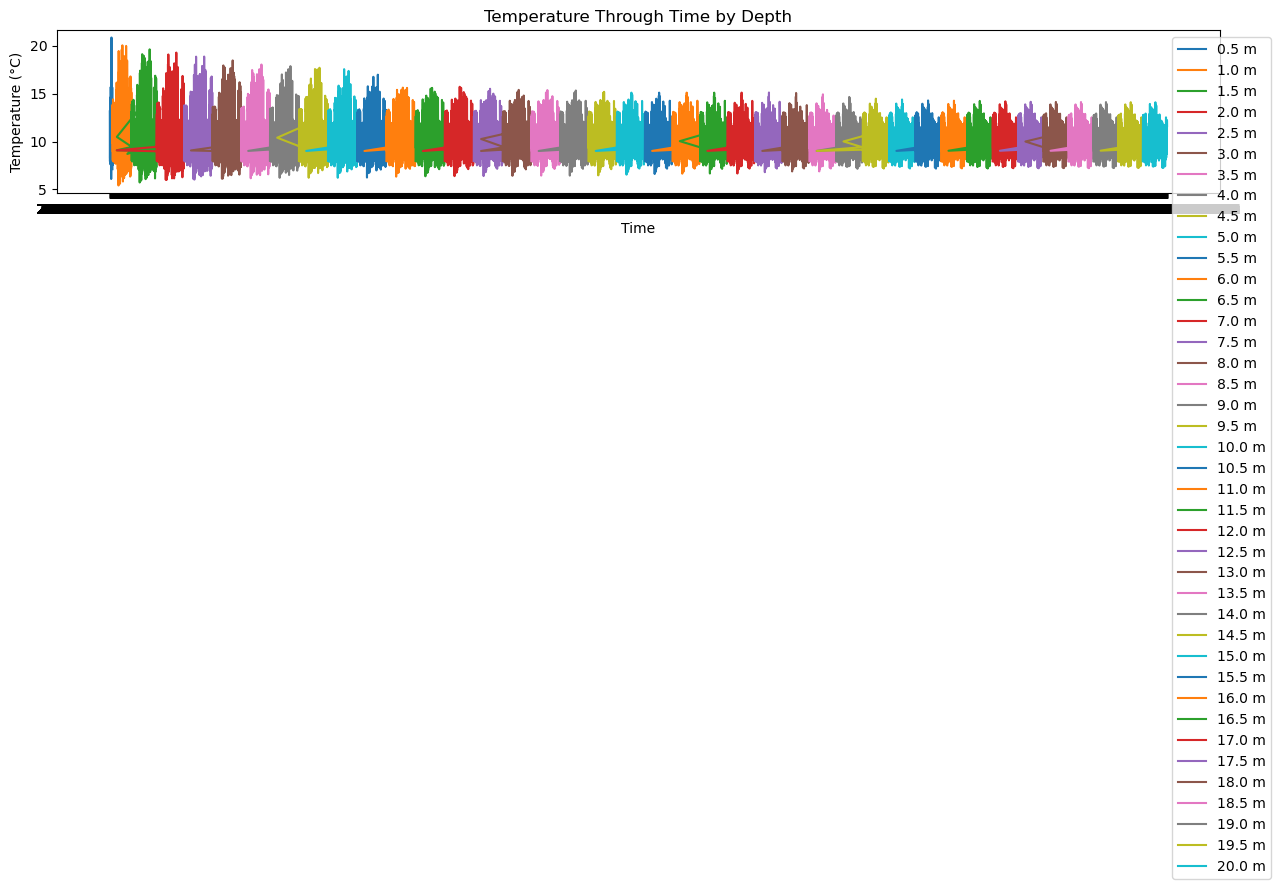

In [16]:
temp_eim = fact_sheet[fact_sheet["NWSC_Max"] == 0]

plt.figure(figsize=(14,6))

for depth, group in temp_eim.groupby("depth"):
    plt.plot(group["date_time"],
             group["result"],
             label=f"{depth} m")

plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Through Time by Depth")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

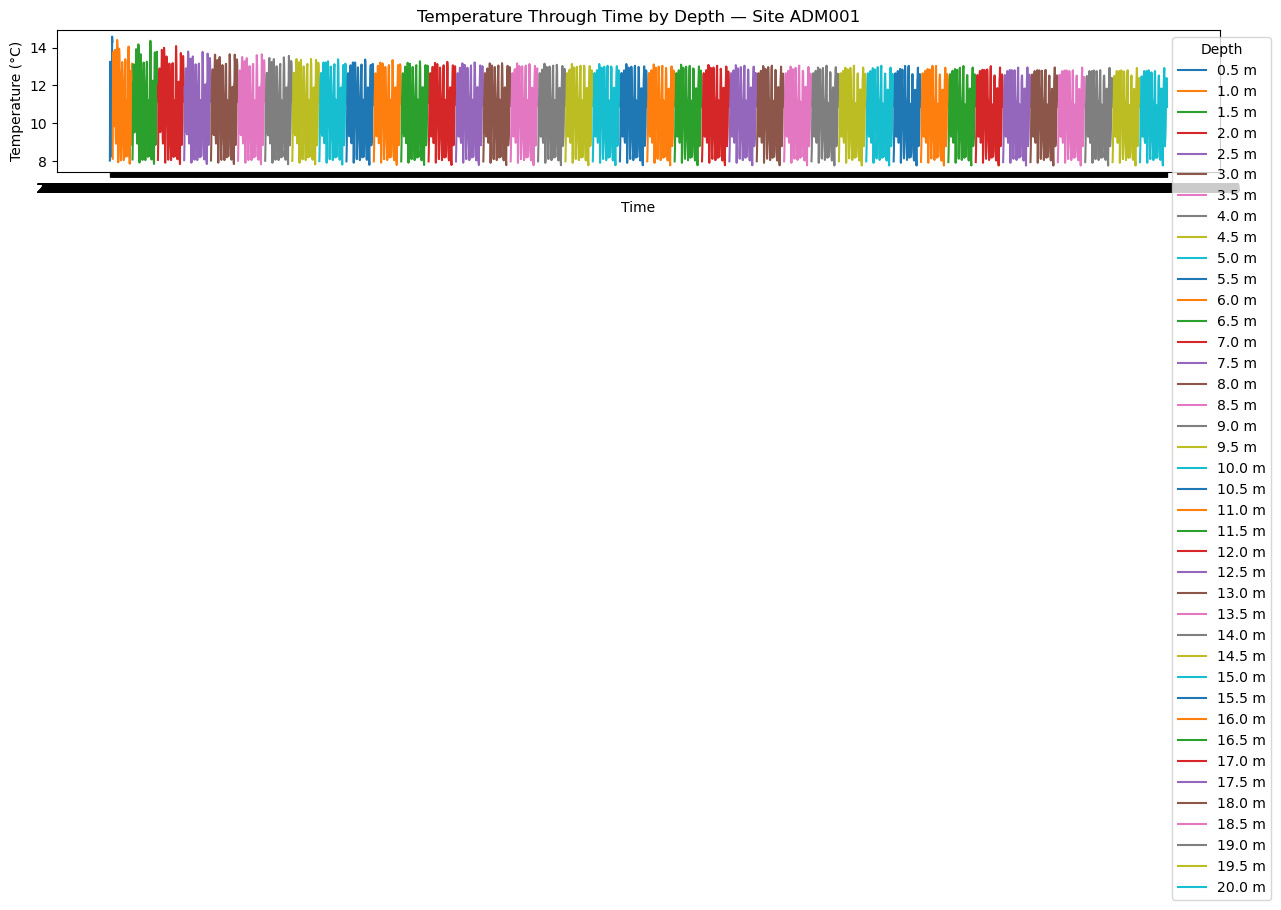

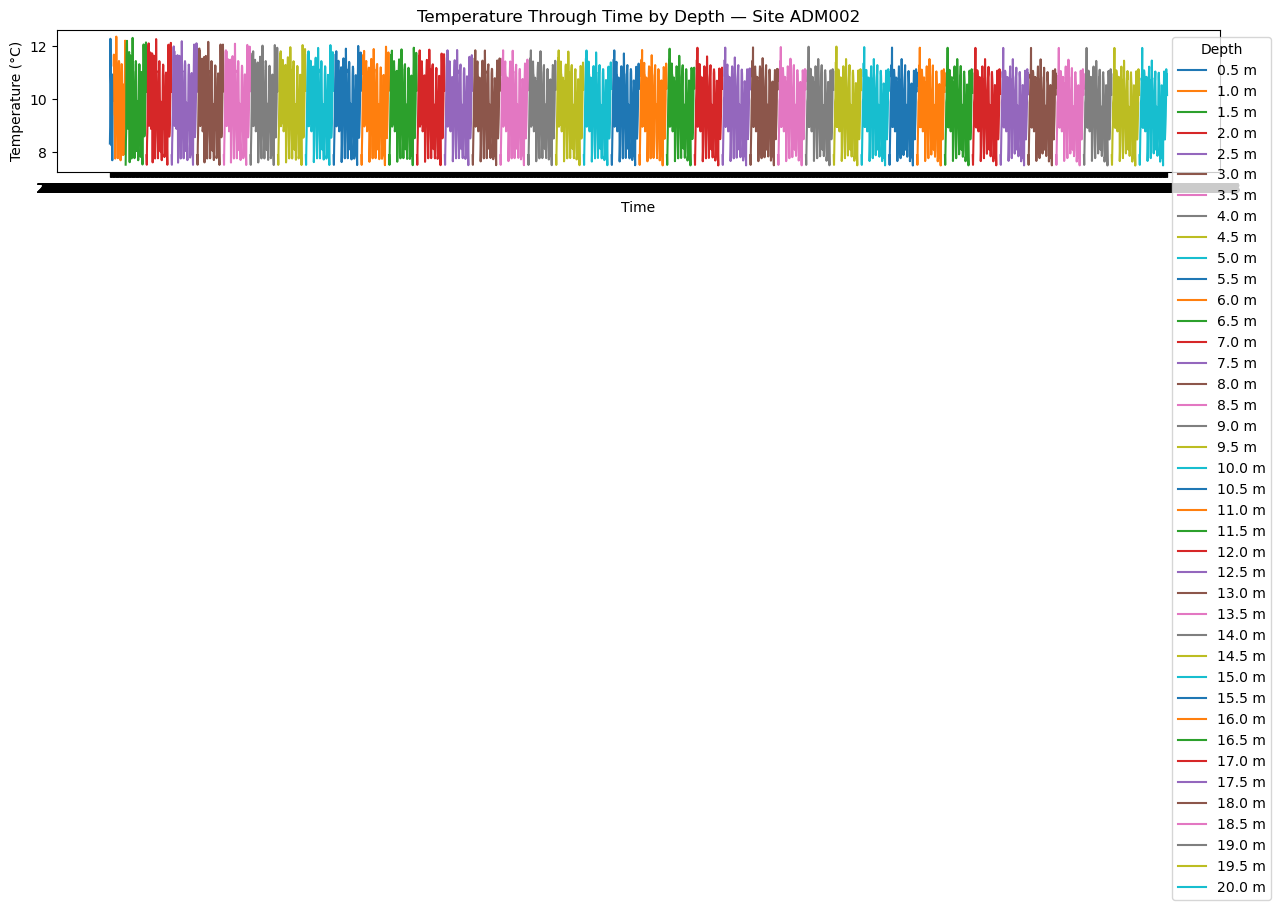

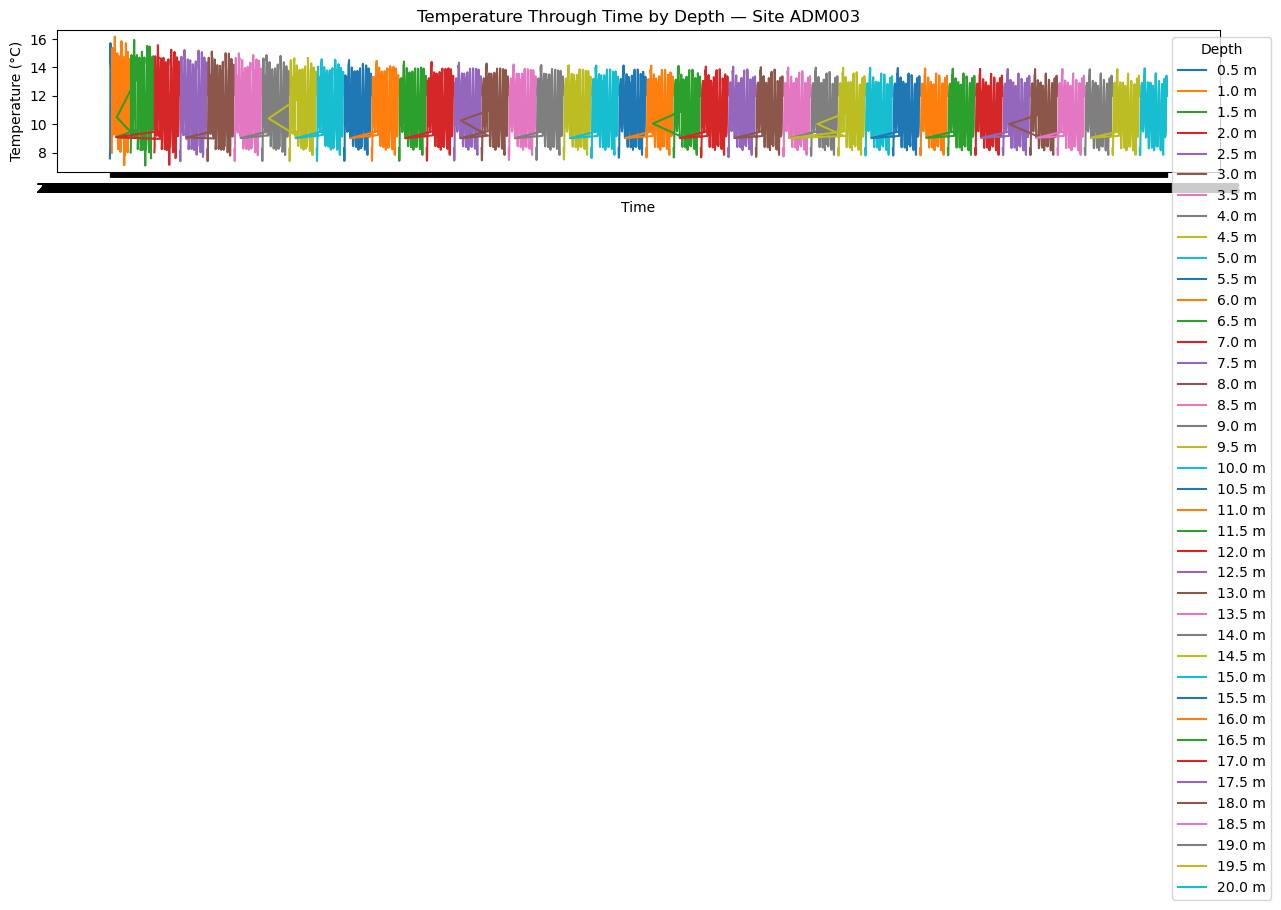

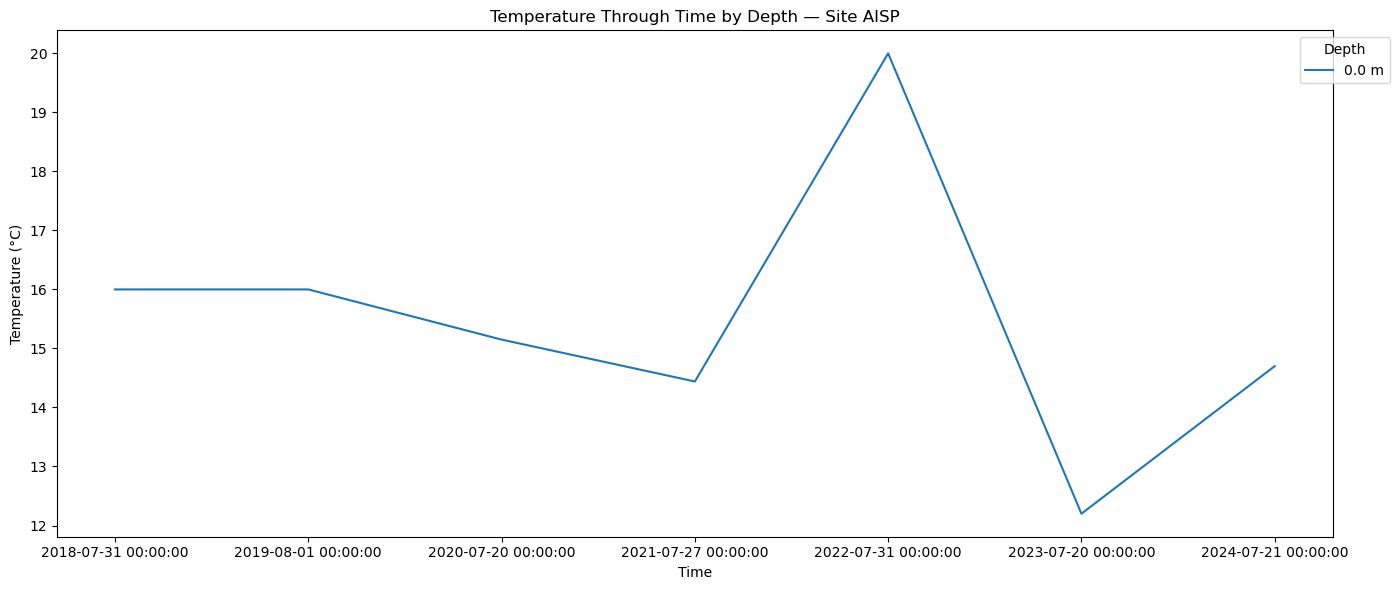

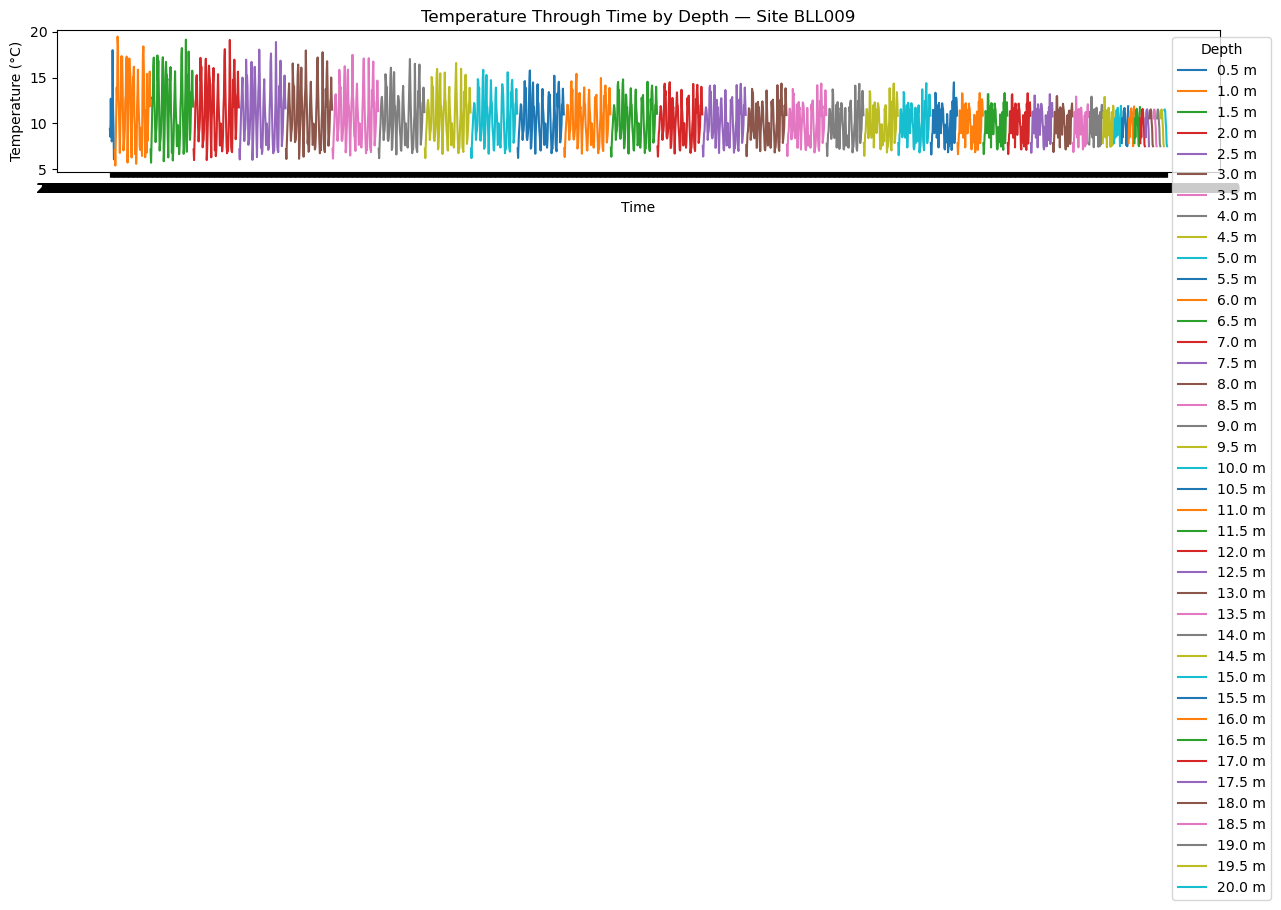

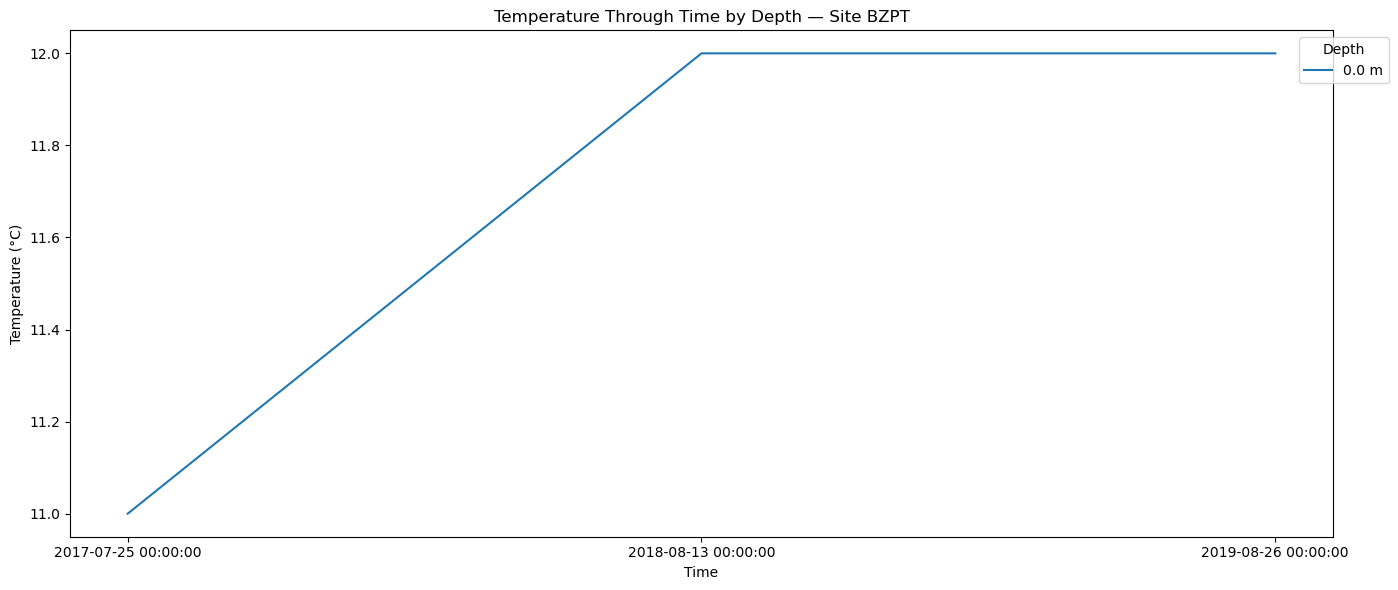

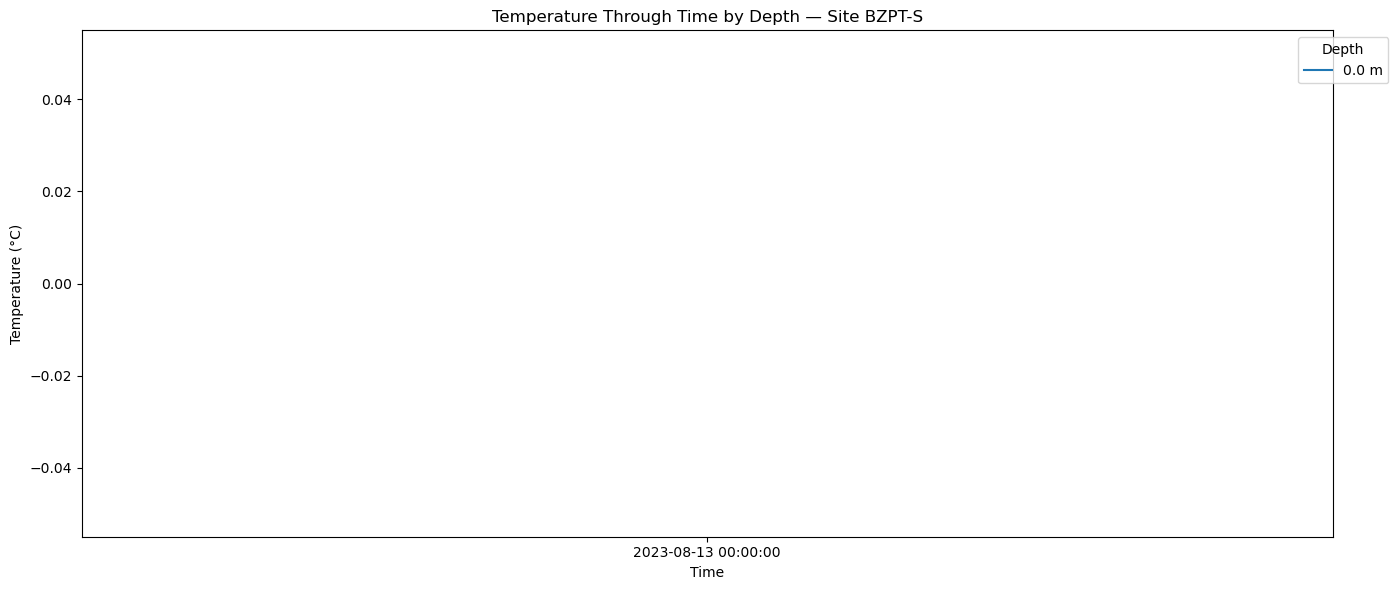

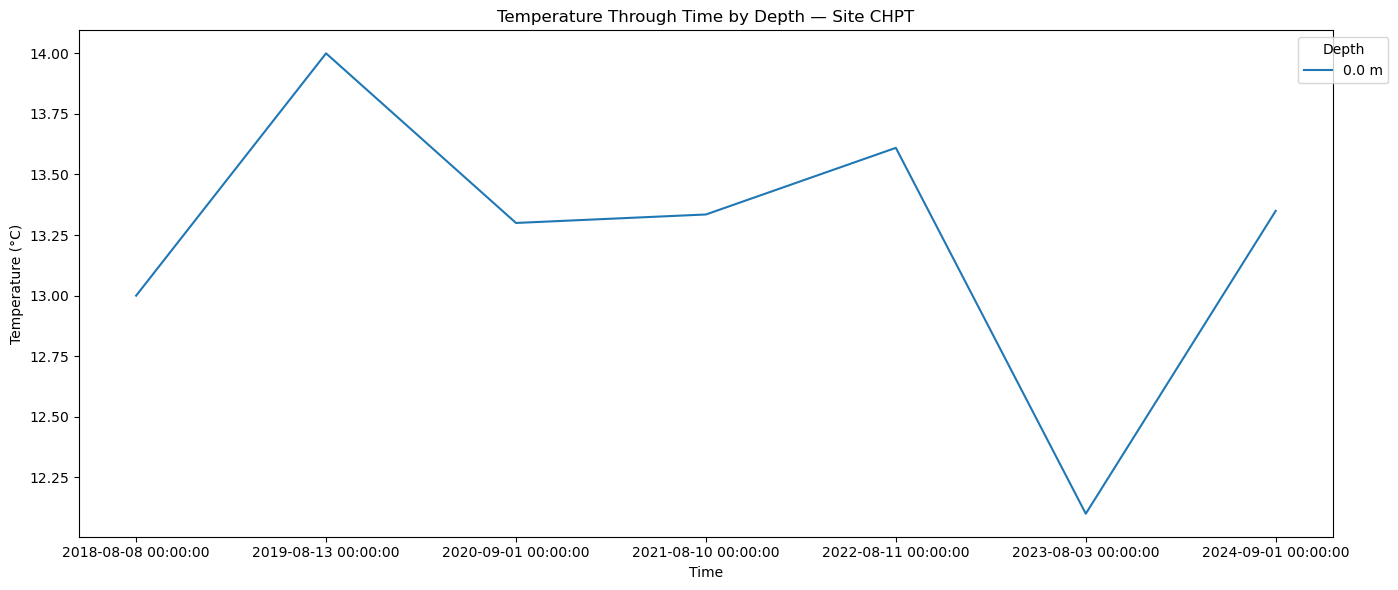

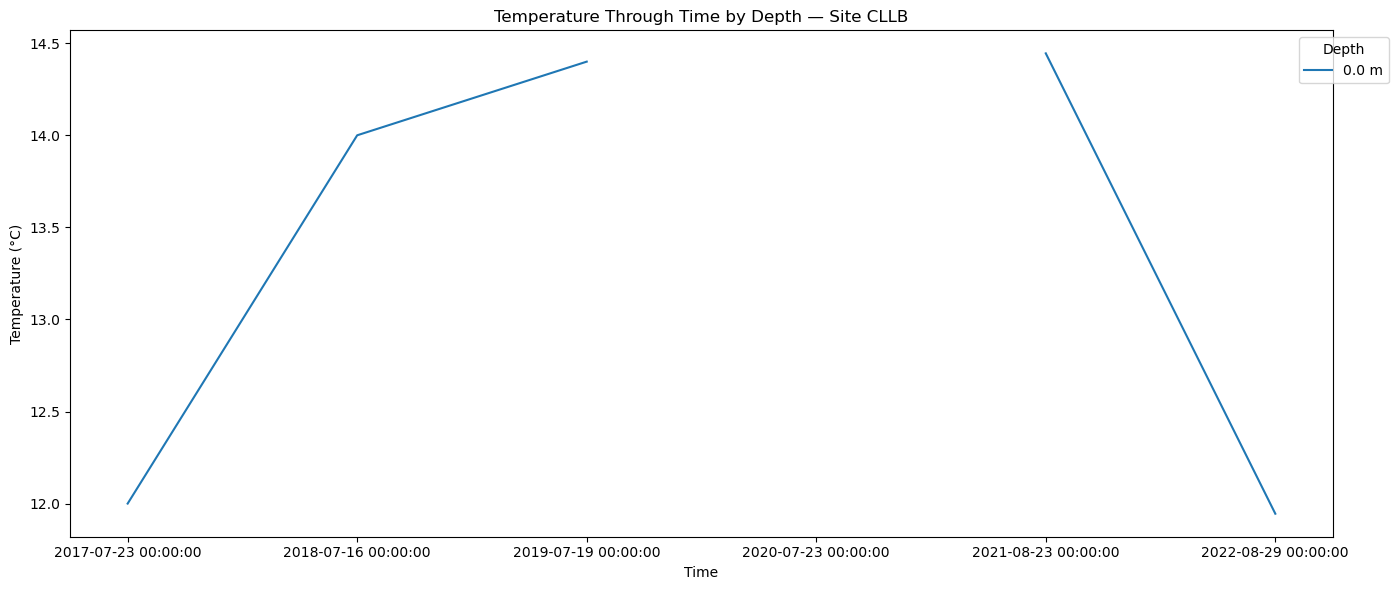

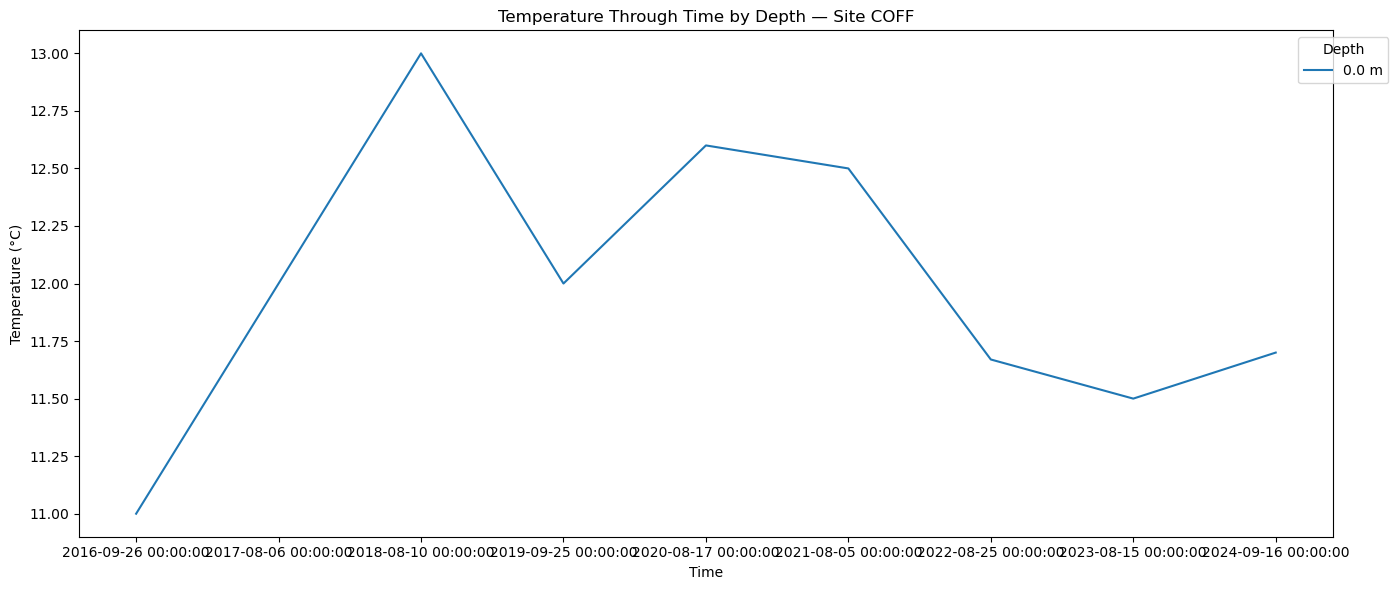

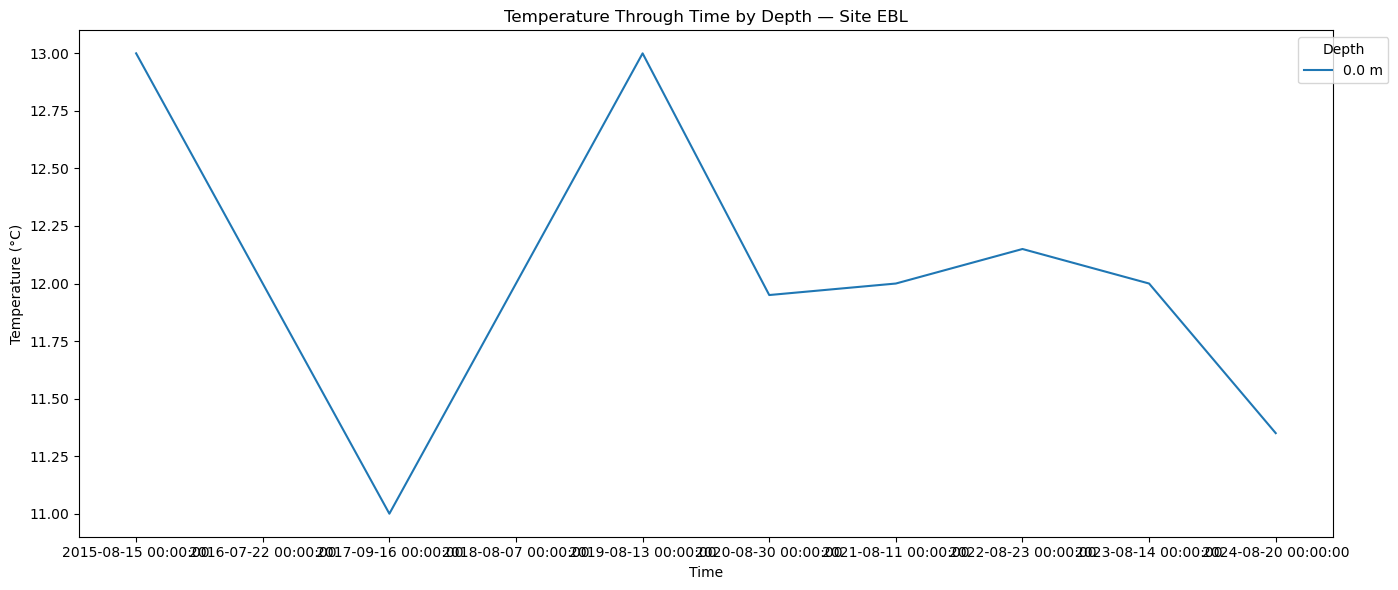

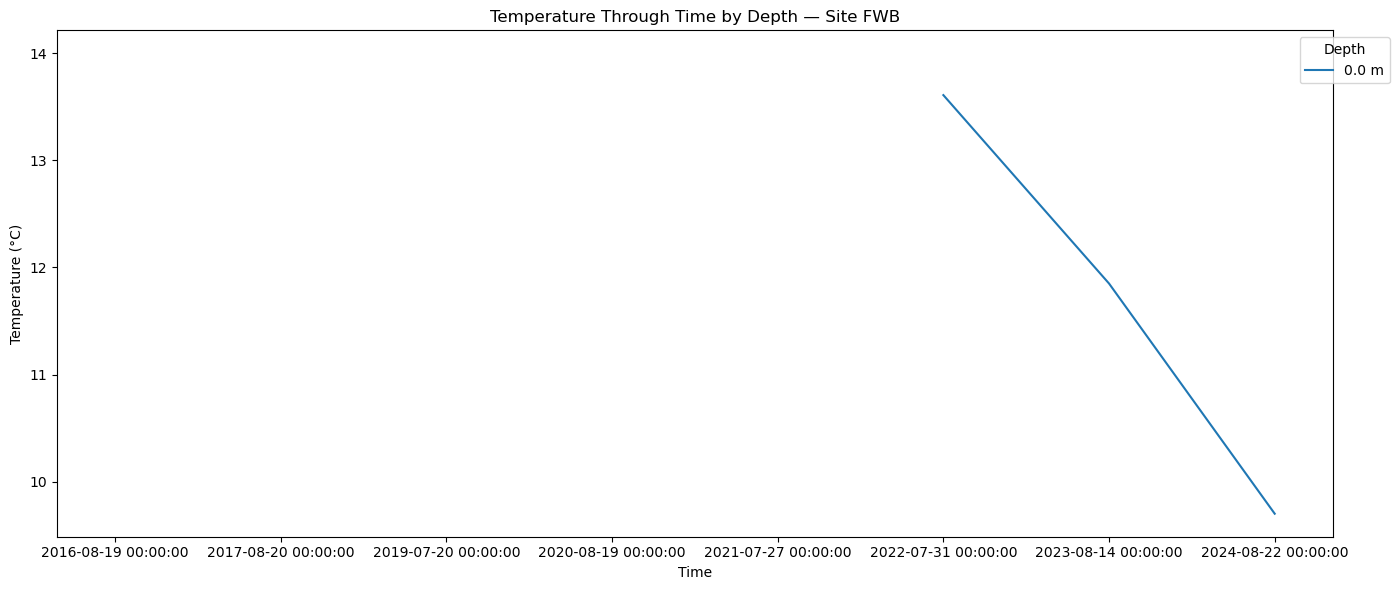

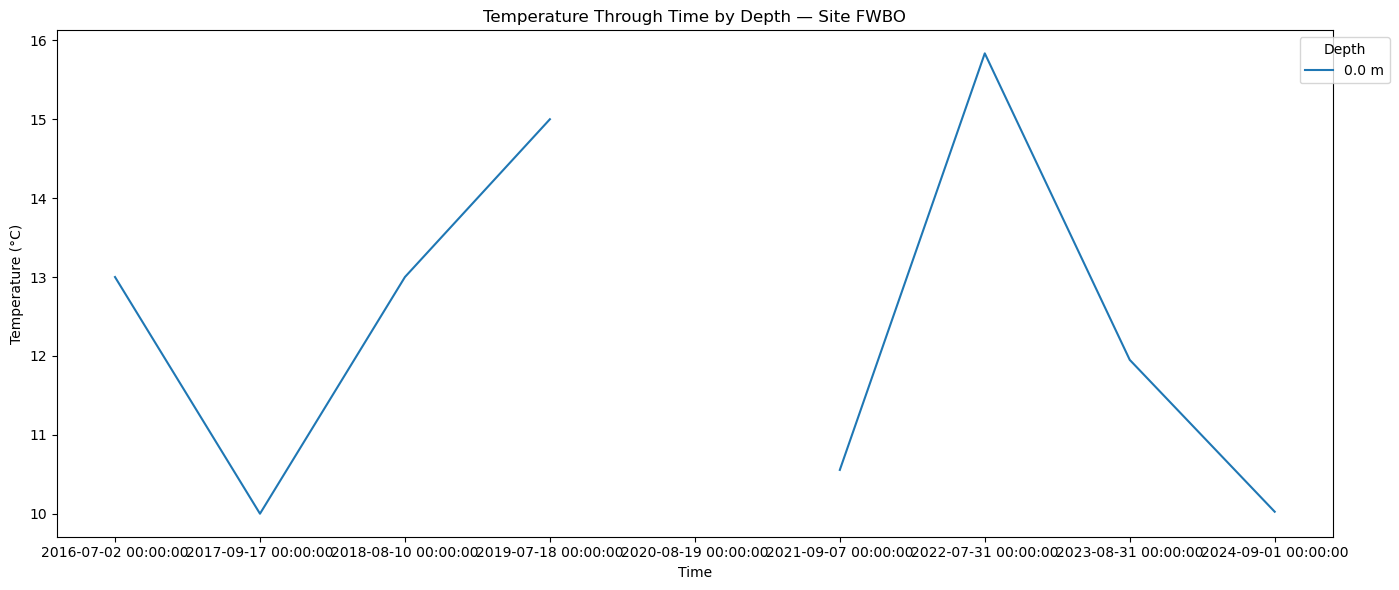

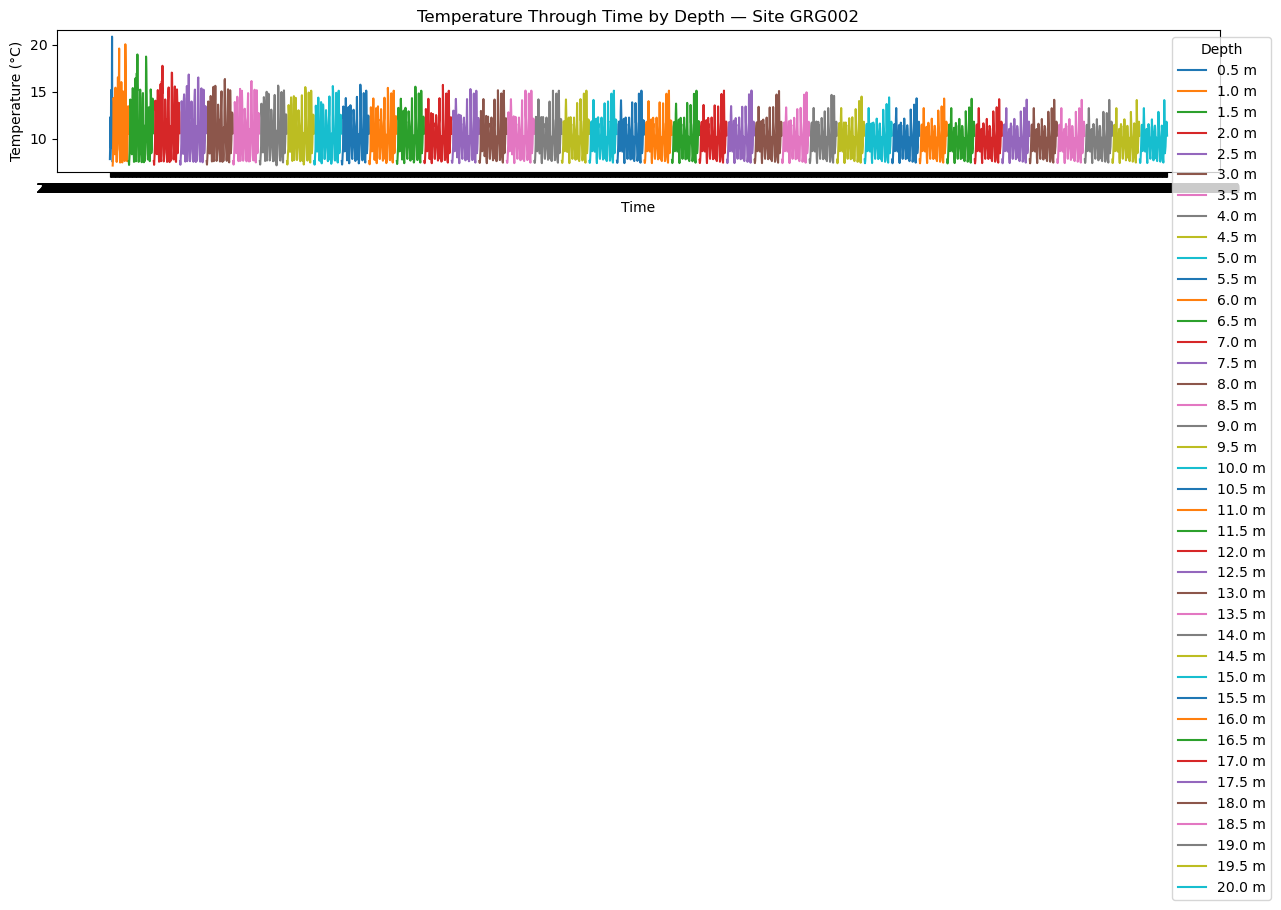

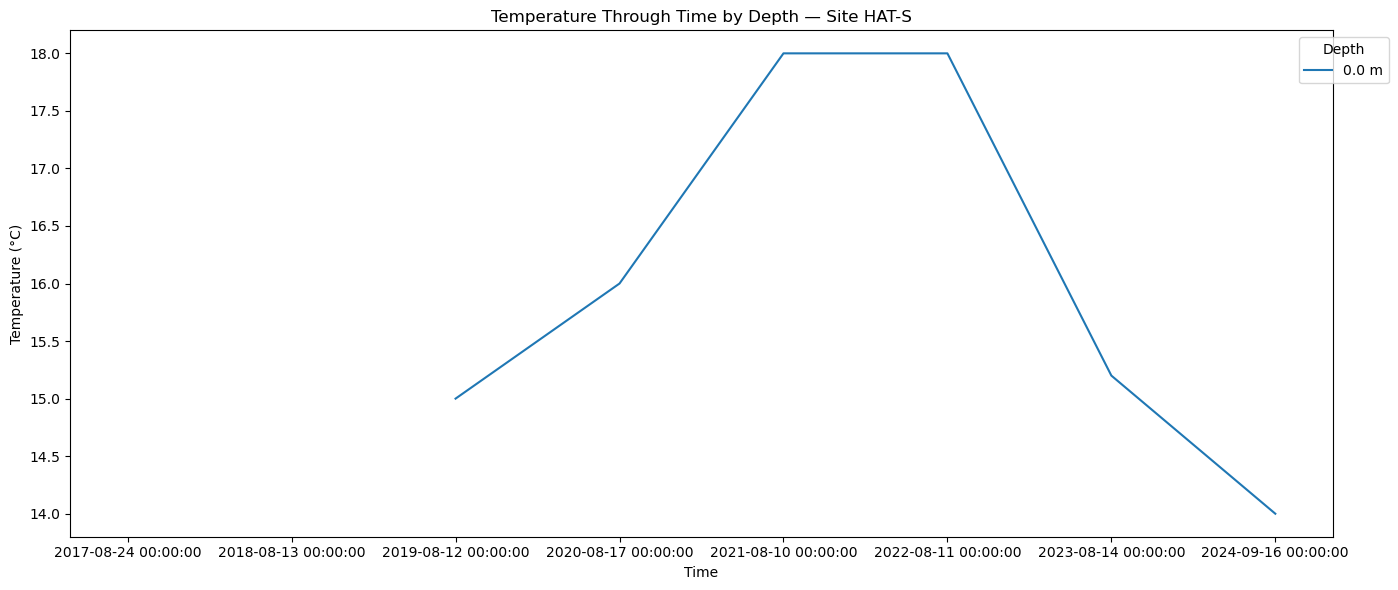

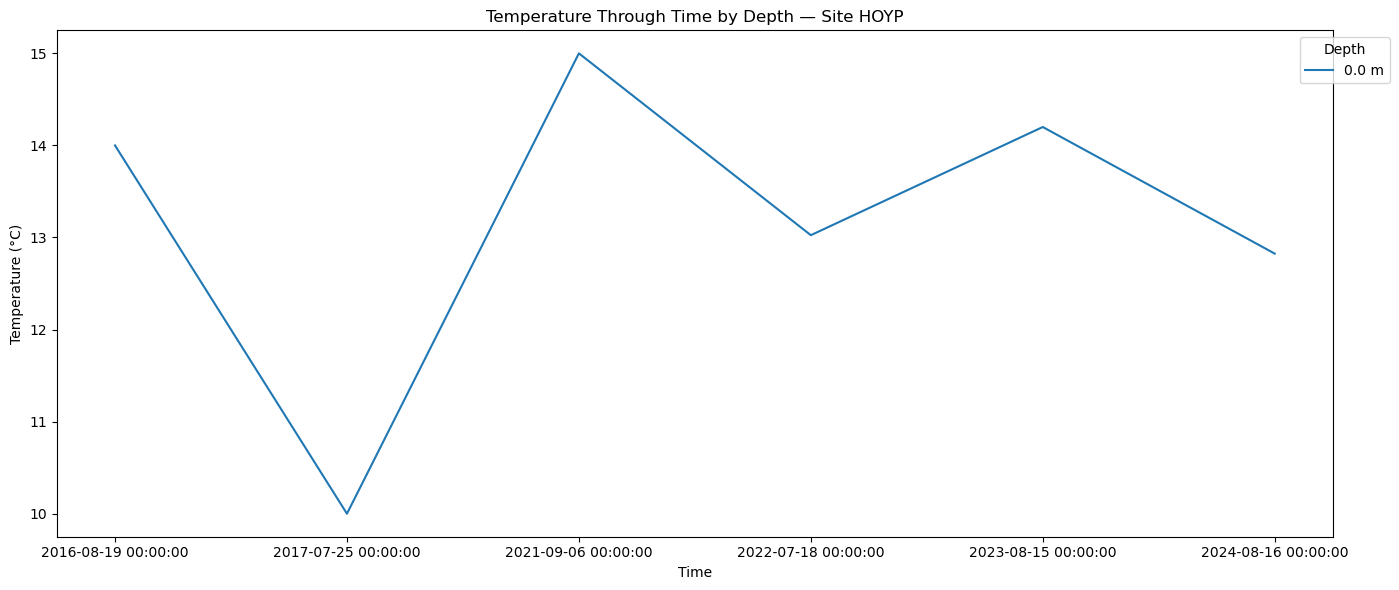

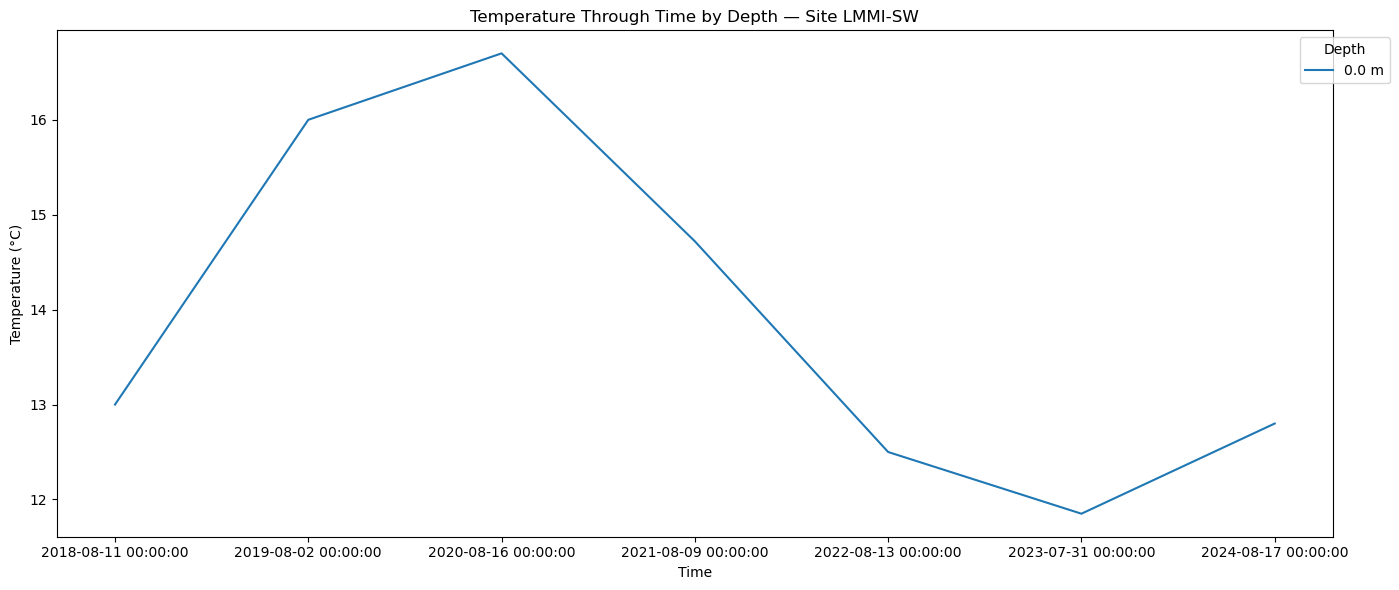

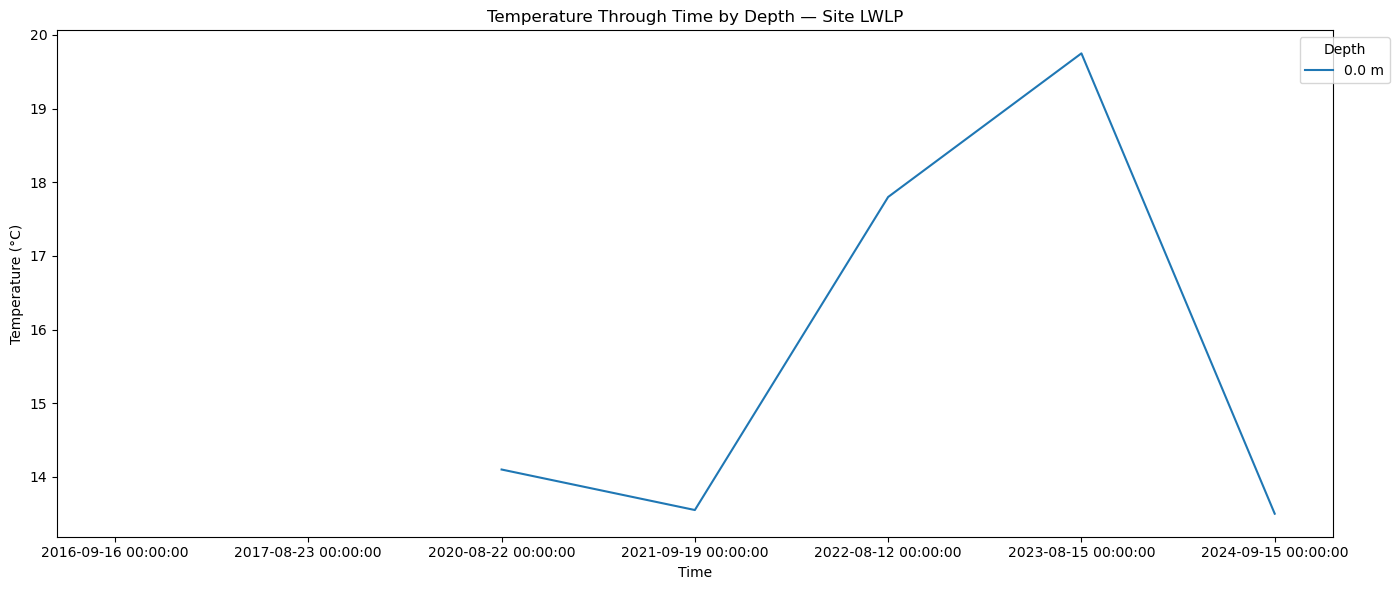

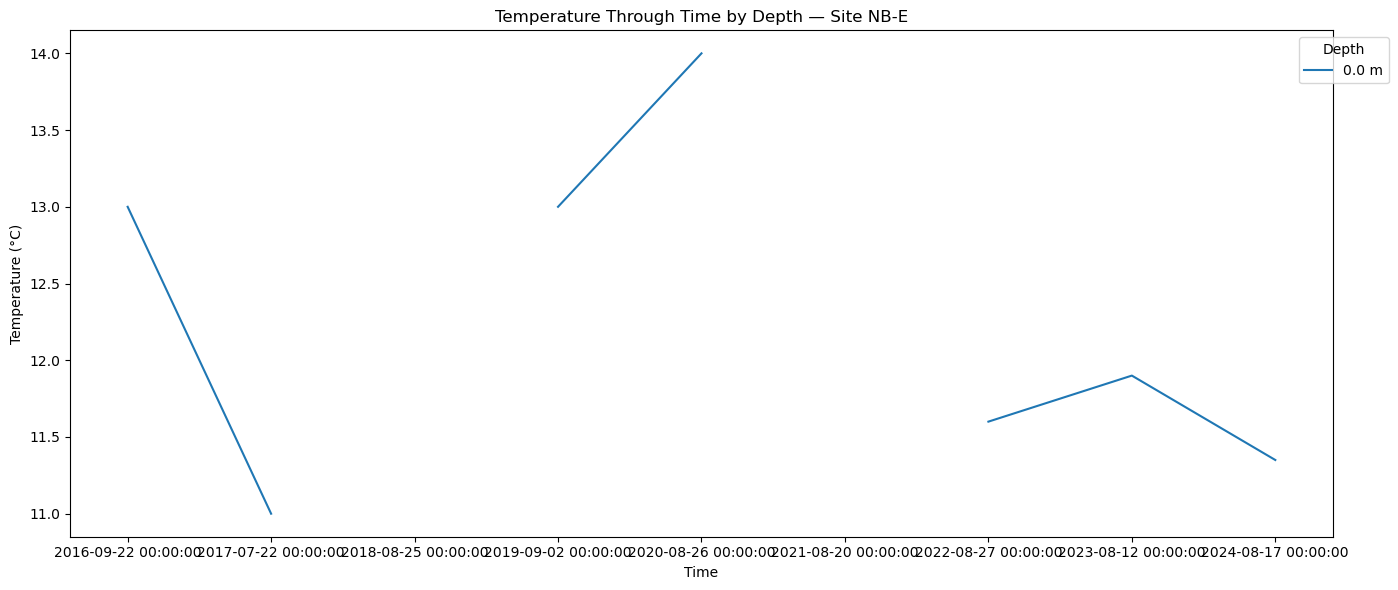

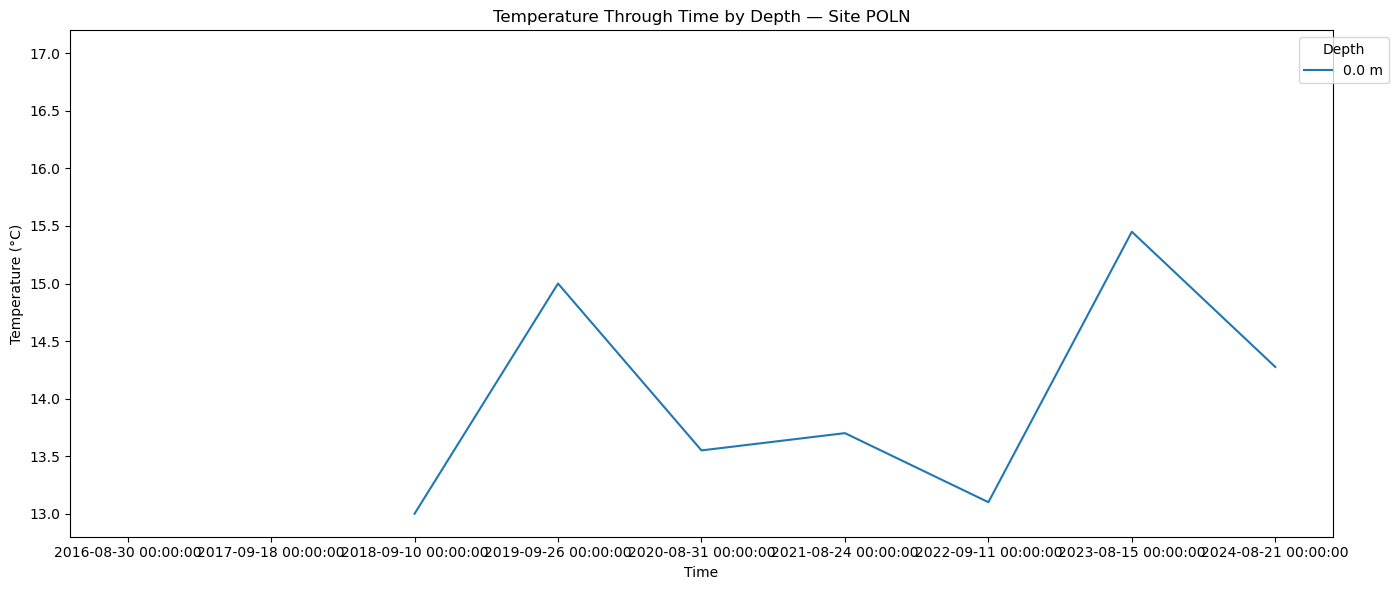

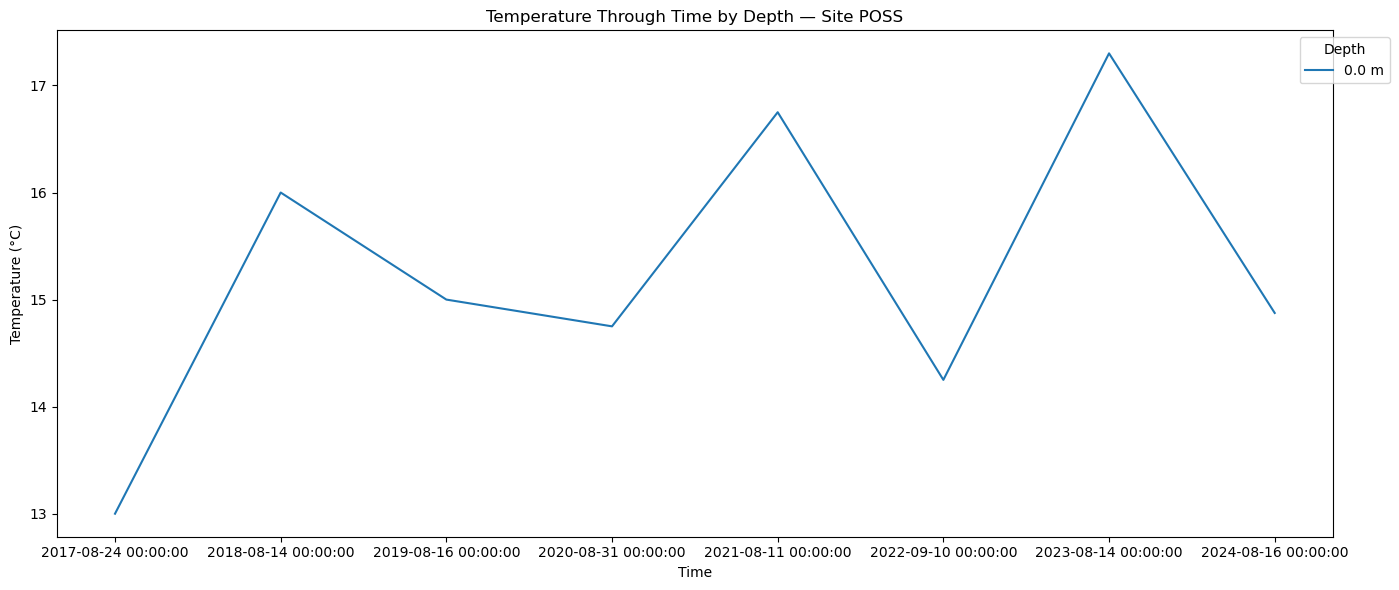

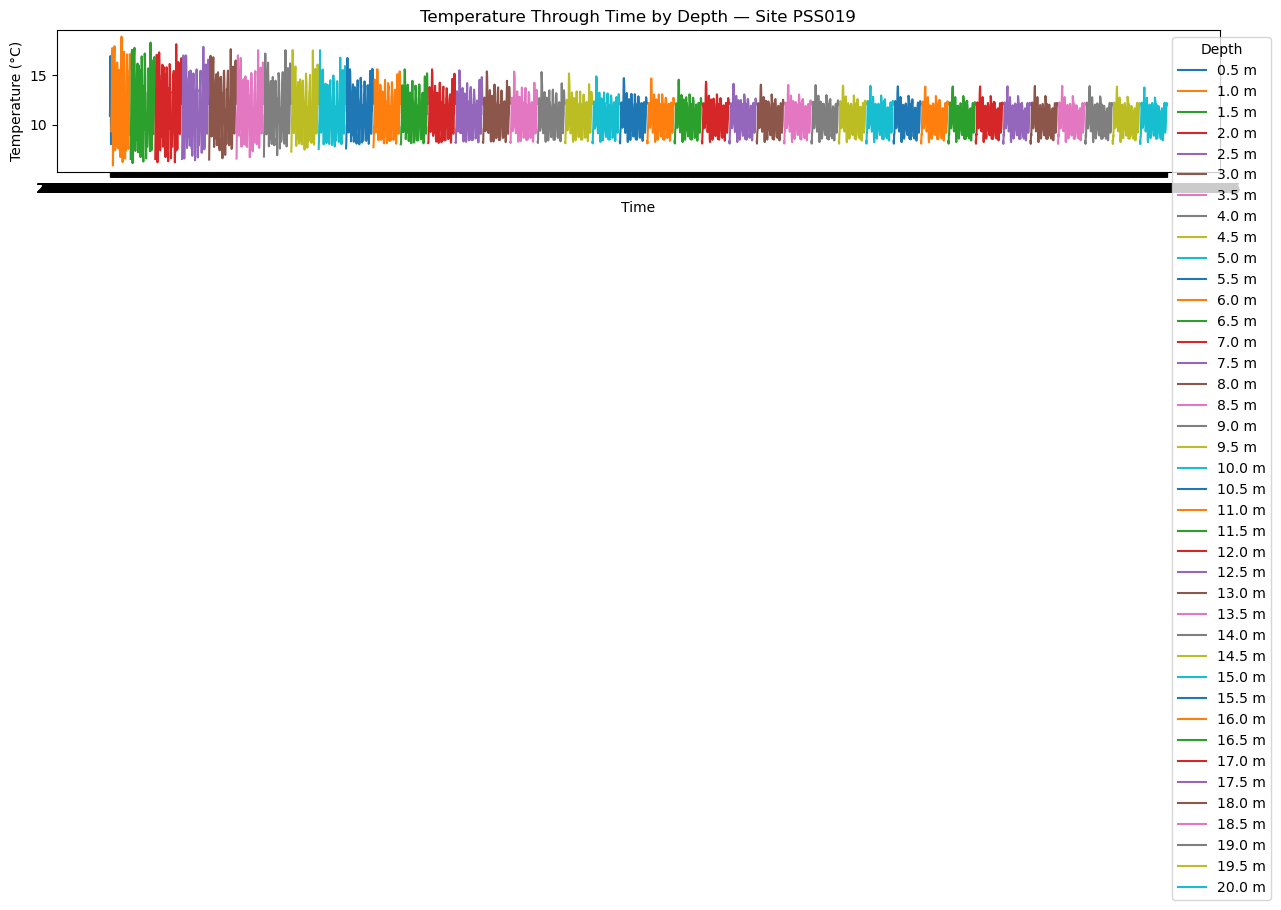

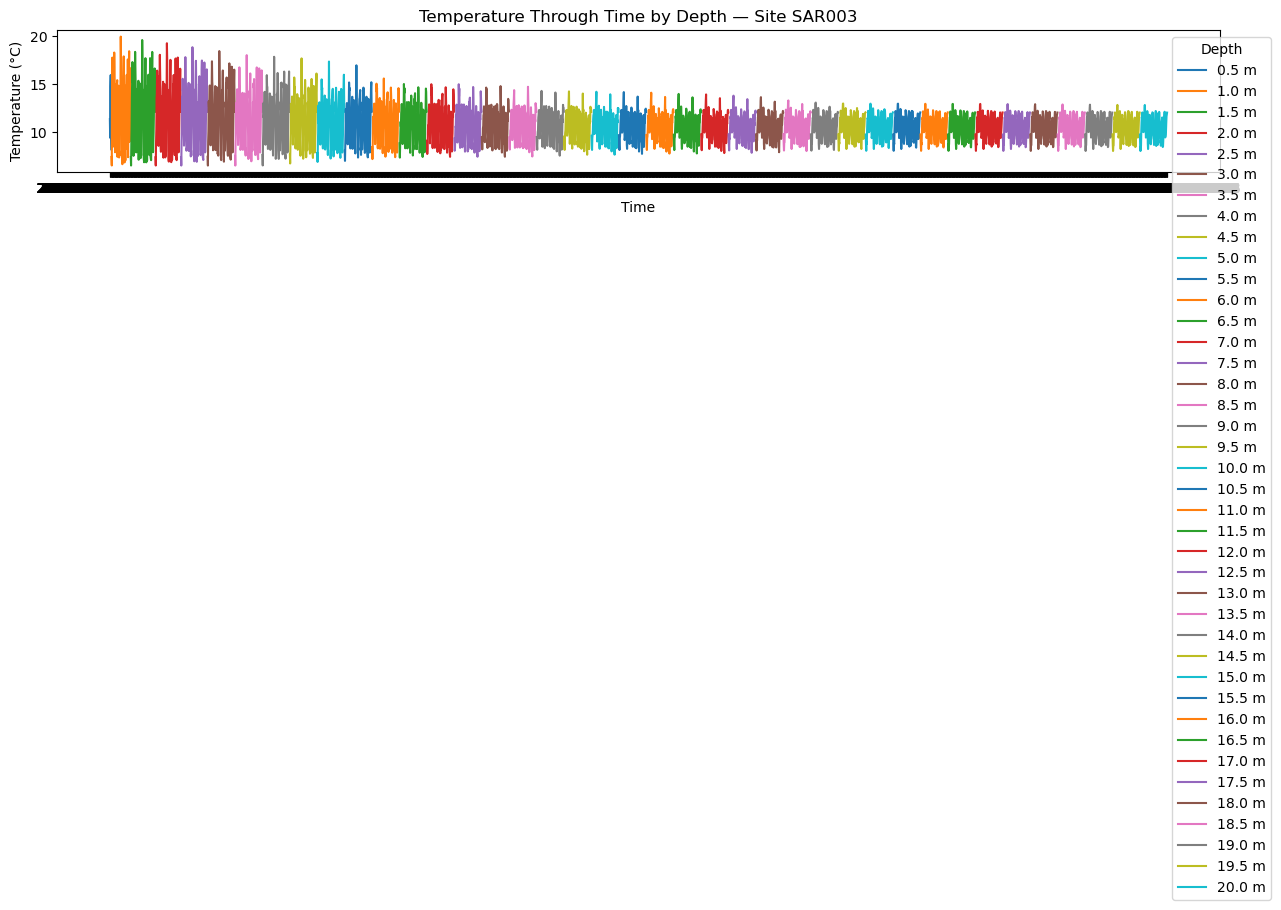

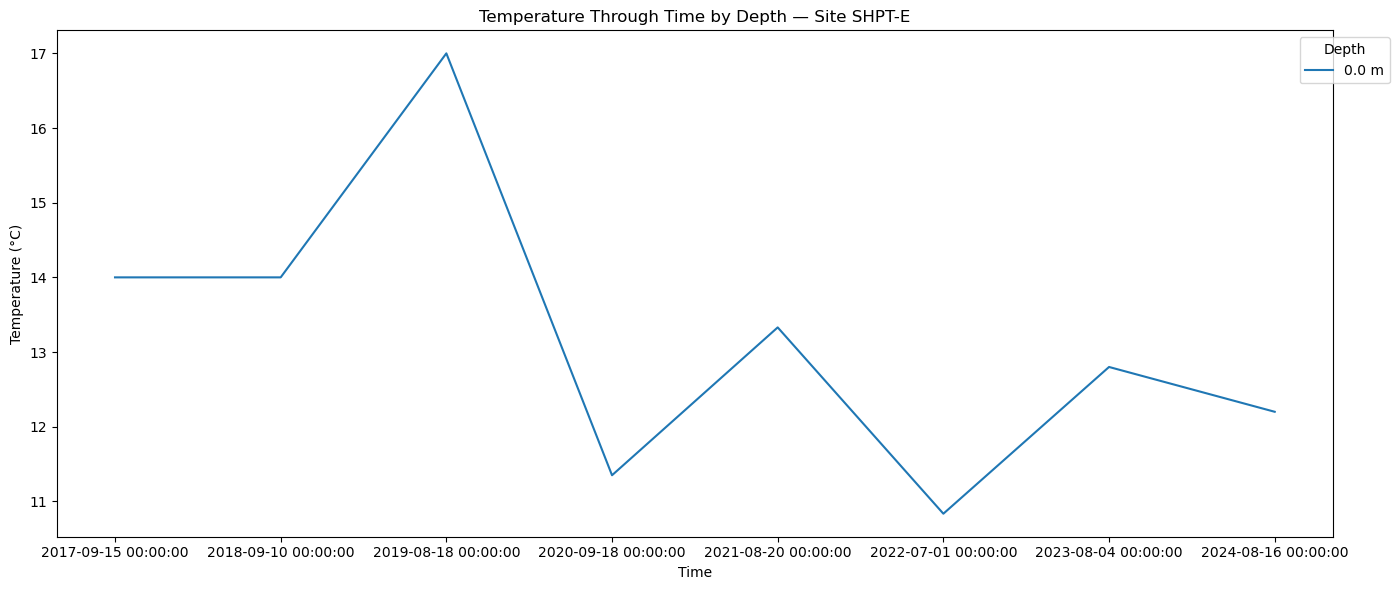

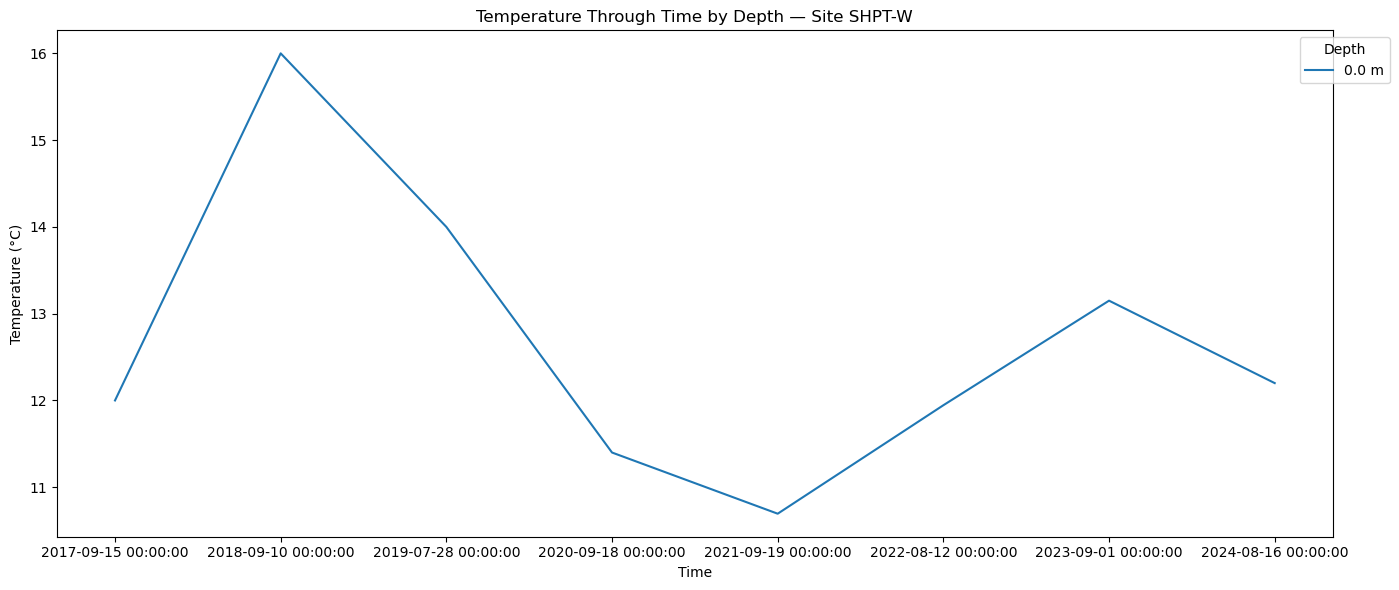

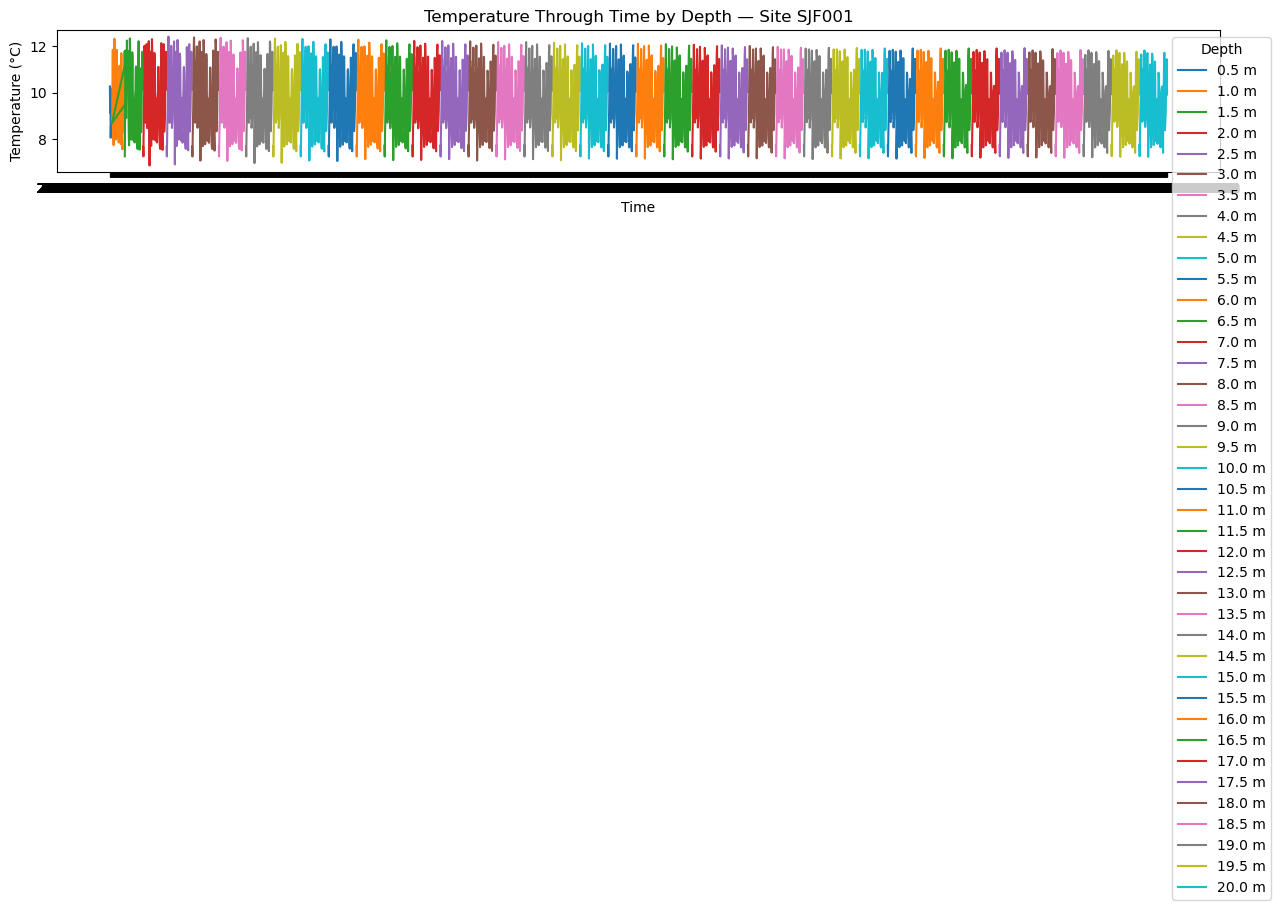

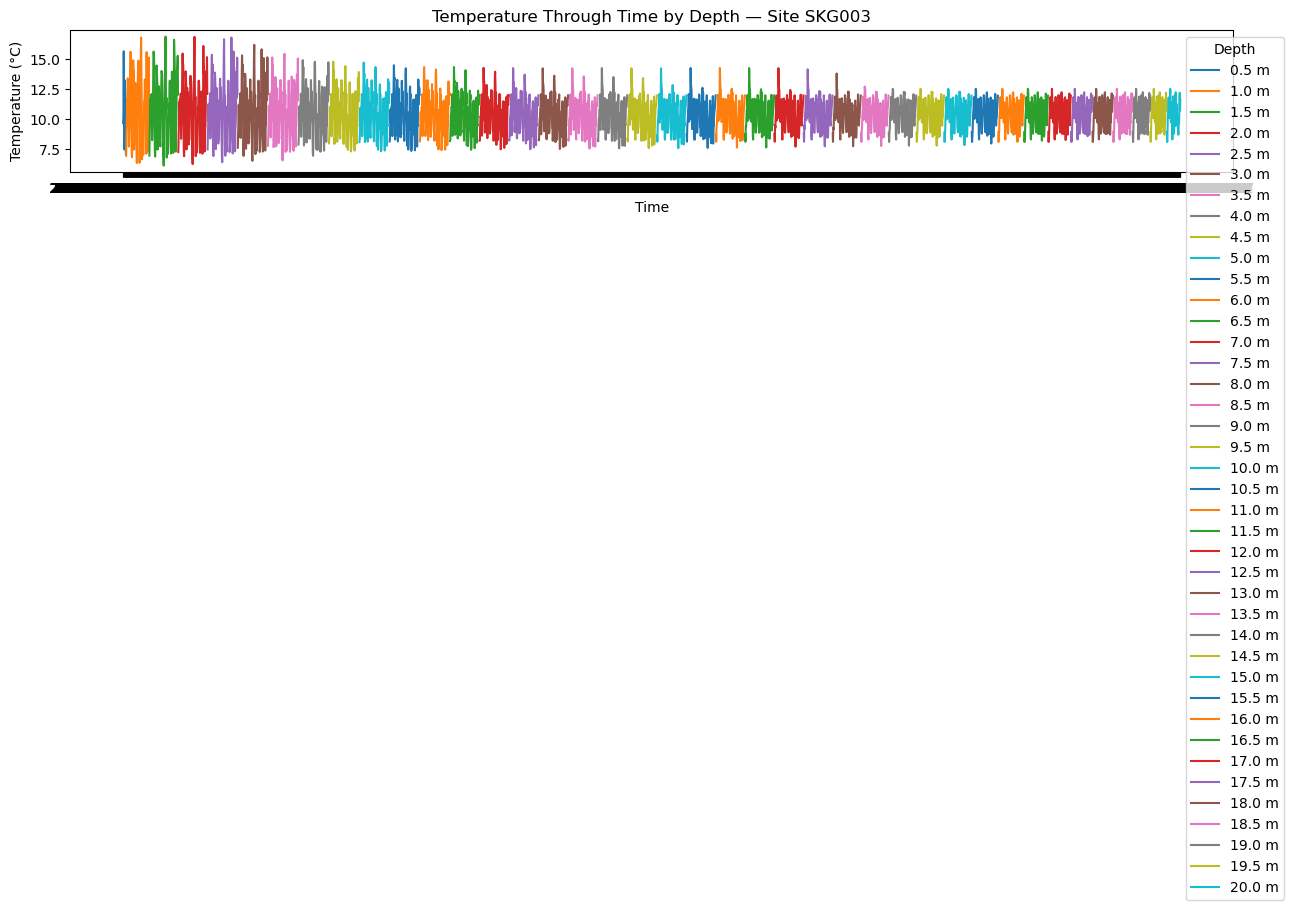

In [12]:
depths = sorted(temp_eim["depth"].unique())

for site, site_df in temp_eim.groupby("lid"):

    plt.figure(figsize=(14,6))

    for depth in depths:
        subset = site_df[site_df["depth"] == depth]
        if not subset.empty:
            plt.plot(subset["date_time"],
                     subset["result"],
                     label=f"{depth} m")

    plt.xlabel("Time")
    plt.ylabel("Temperature (°C)")
    plt.title(f"Temperature Through Time by Depth — Site {site}")
    plt.legend(title="Depth", bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

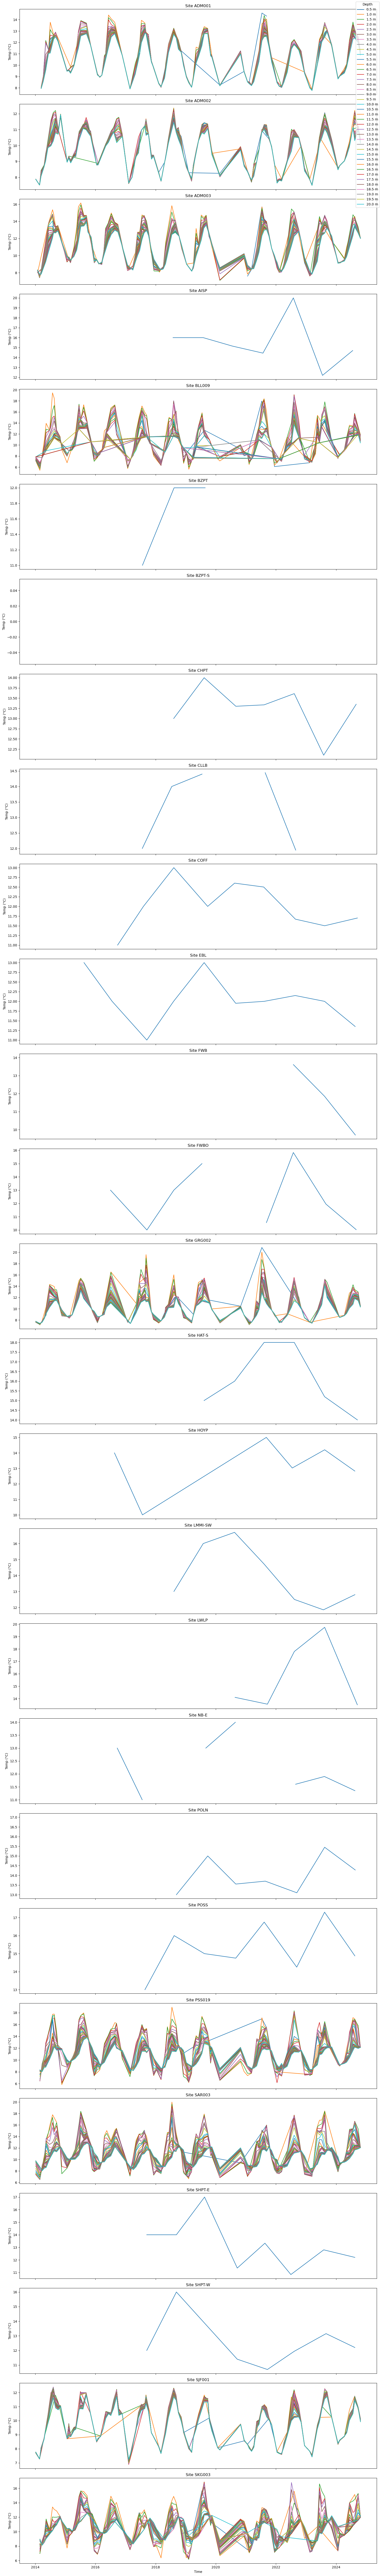

In [9]:
df = fact_sheet.copy()
df["date_time"] = pd.to_datetime(df["date_time"])

sites = sorted(df["lid"].unique())
depths = sorted(df["depth"].unique())


fig, axes = plt.subplots(
    nrows=len(sites),
    ncols=1,
    figsize=(16, 4 * len(sites)),
    sharex=True
)

if len(sites) == 1:
    axes = [axes]

for ax, site in zip(axes, sites):
    site_df = df[df["lid"] == site]

    for depth, g in site_df.groupby("depth"):
        ax.plot(g["date_time"], g["result"], label=f"{depth} m")

    ax.set_title(f"Site {site}")
    ax.set_ylabel("Temp (°C)")

axes[-1].set_xlabel("Time")

handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, title="Depth", loc="upper right")

plt.tight_layout()
plt.show()